Download this page as a jupyter notebook at [Lesson 16](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson16/ENGR-1330-Lesson16.ipynb)

---

# ENGR 1330 Computational Thinking with Data Science 
Last GitHub Commit Date: 31 January 2021

## Lesson 16 Hypothesis Testing
A procedure to systematically decide if two data collections are similar or substantially different.

---

In [19]:
# Script block to identify host, user, and kernel
import sys
! hostname; ! whoami; ! pwd; 
print(sys.executable)

atomickitty
sensei
/home/sensei/engr-1330-webroot/1-Lessons/Lesson15
/opt/jupyterhub/bin/python3


In [20]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

---

## Objectives
- To apply fundamental concepts involved in probability estimation modeling and descriptive statistics;
  - Concept of a hypothesis
- Hypothesis components
  - Null hypothesis and alternative hypothesis
  - Normal distribution model
  - One-tail, two-tail tests
  - Attained significance
- Decision Error
  - Type-1, Type-2

  
---

## Computational Thinking Concepts
The CT concepts include:

- Abstraction => Represent data behavior with a function 
- Pattern Recognition => Patterns in data models to make decision
---


 In statistics, when we wish to start asking questions about the data and interpret the results, we use statistical methods that provide a confidence or likelihood about the answers. In general, this class of methods is called statistical hypothesis testing, or significance tests. The material for today's lecture is inspired by and gathered from several resources including:
1. Hypothesis testing in Machine learning using Python by Yogesh Agrawal available at https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
2. Demystifying hypothesis testing with simple Python examples by Tirthajyoti Sarkar available at https://towardsdatascience.com/demystifying-hypothesis-testing-with-simple-python-examples-4997ad3c5294
3. A Gentle Introduction to Statistical Hypothesis Testing by Jason Brownlee available at https://machinelearningmastery.com/statistical-hypothesis-tests/

---
### Fundamental Concepts

#### <font color=crimson>What is hypothesis testing ?</font><br>
Hypothesis testing is a statistical method that is used in making statistical decisions (about population) using experimental data (samples). Hypothesis Testing is basically an assumption that we make about the population parameter.<br>

Example : You state "on average, students in the class are taller than 5 ft and 4 inches" or "an average boy is taller than an average girl" or "a specific treatment is effective in treating COVID-19 patients". <br>

We need some mathematical way support that whatever we are stating is true. 
We validate these hypotheses, basing our conclusion on random samples and empirical distributions.

#### <font color=crimson>Why do we use it ?</font><br>
Hypothesis testing is an essential procedure in experimentation. A hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is supported by the sample data. When we say that a finding is **statistically significant**, it’s thanks to a hypothesis test.

![](https://luminousmen.com/media/demystifying-hypothesis-testing.jpg)

#### <font color=crimson>What are important elements of hypothesis testing ?</font><br>
__Null hypothesis__ :<br> 
    The assumption of a statistical test is called the null hypothesis, or hypothesis 0 (H0 for short). It is often called the default assumption, or the assumption that nothing has changed. In inferential statistics, the null hypothesis is a general statement or default position that there is no relationship between two measured phenomena, or no association among groups. In other words it is a basic assumption or made based on domain or problem knowledge.
Example : a company' production is = 50 unit/per day.
    
__Alternative hypothesis :__<br> 
    A violation of the test’s assumption is often called the first hypothesis, hypothesis 1 or H1 for short. H1 is really a short hand for “some other hypothesis,” as all we know is that the evidence suggests that the H0 can be rejected. The alternative hypothesis is the hypothesis used in hypothesis testing that is contrary to the null hypothesis. It is usually taken to be that the observations are the result of a real effect (with some amount of chance variation superposed). 
Example : a company's production is !=50 unit/per day.
    

#### <font color=crimson>What is the basis of a hypothesis test?</font><br>
The basis of a hypothesis test is often normalisation and standard normalisation. 
All our hypothesis revolve around these 2 terms.<br>

![](https://miro.medium.com/max/350/1*U-cR-vP8pYUmLUDwCPv23A.png) <br>
![](https://miro.medium.com/max/350/1*2vTwIrqdELKJY-tpheO7GA.jpeg) <br>

in the 1st image, you can see there are different normal curves. Those normal curves have different means and variances. 

In the 2nd image if you notice the graph is properly distributed with a mean =0 and variance =1. Concept of z-score comes in picture when we use standardized normal data.

#### Normal Distribution:
A variable is said to be normally distributed or have a normal distribution if its distribution has the shape of a normal curve — a special bell-shaped curve. The graph of a normal distribution is called the normal curve, for which the mean, median, and mode are equal. (The 1st Image)
#### Standardised Normal Distribution:
A standard normal distribution is a normal distribution with mean 0 and standard deviation 1 (The 2nd Image)

In [95]:
import math # lesson 13 functions

def normdensity(x,mu,sigma):
    weight = 1.0 /(sigma * math.sqrt(2.0*math.pi))
    argument = ((x - mu)**2)/(2.0*sigma**2)
    normdensity = weight*math.exp(-1.0*argument)
    return normdensity

def normdist(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

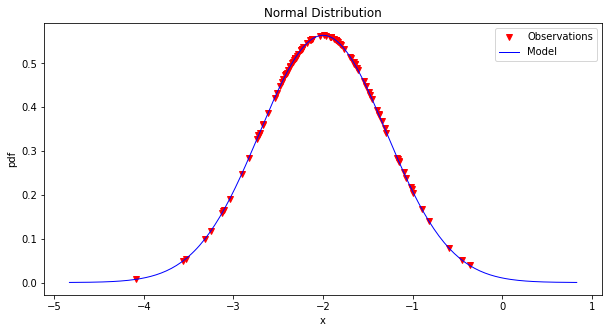

In [111]:
# create some observations
import numpy
mu = -2.0
sigma = math.sqrt(0.5)
observations = sigma * numpy.random.randn(100) + mu
observations = numpy.sort(observations)
# print(observations)
pdf = [0 for i in range(observations.size)]
for i in range(observations.size):
    pdf[i]=normdensity(observations[i],mu,sigma)
#    pdf[i]=normdist(observations[i],mu,sigma)
modeldom = numpy.linspace(mu-4*sigma,mu+4*sigma,200)
modelran = [0 for i in range(modeldom.size)]
for i in range(modeldom.size):
    modelran[i]=normdensity(modeldom[i],mu,sigma)
#    modelran[i]=normdist(modeldom[i],mu,sigma)
import make2plot # http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson16/make2plot.py
make2plot.make2plot(observations,pdf,modeldom,modelran,"x","pdf","Normal Distribution") # notice module_name.function_name(arguments) syntax

#### <font color=crimson>Z score:</font><br>
It is a method of expressing data in relation to the group mean. To obtain the Z-score of a particular data, we calculate its deviation from the mean and then divide it by the SD.<br> 
![](https://clavelresearch.files.wordpress.com/2019/03/z-score-sample.png) <br>

The Z score is one way of standardizing a score so that it can be referred to a standard normal distribution curve.<br>  
![](https://datalabbd.com/wp-content/uploads/2019/05/4a.png) <br>

Read more on Z-Score @
- Z-Score: Definition, Formula and Calculation* available at https://www.statisticshowto.com/probability-and-statistics/z-score/
- Z-Score: Definition, Calculation and Interpretation* by Saul McLeod available at https://www.simplypsychology.org/z-score.html


#### <font color=crimson>Tailing of Hypothesis:</font><br>
   Depending on the research question hypothesis can be of 2 types. In the Nondirectional (two-tailed) test the Research Question is like: Is there a (statistically) significant difference between scores of Group-A and Group-B in a certain competition? In Directional (one-tailed) test the Research Question is like: Do Group-A score significantly higher than Group-B in a certain competition?<br> 
   
![](https://datalabbd.com/wp-content/uploads/2019/05/4d.png) <br>

Read more on Tailing @
- One- and two-tailed tests available at https://en.wikipedia.org/wiki/One-_and_two-tailed_tests__
- Z-Score: Definition, Calculation and Interpretation by Saul McLeod available at https://www.simplypsychology.org/z-score.html__

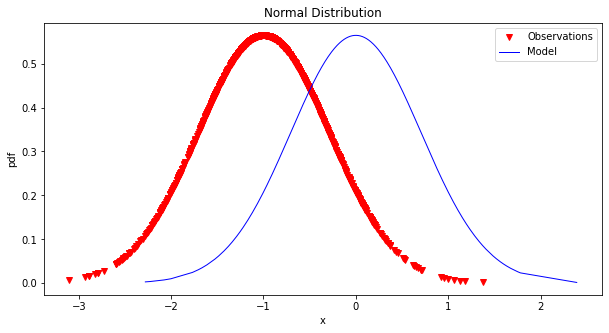

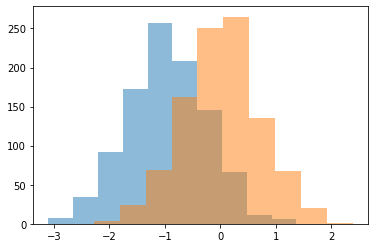

In [145]:
# two samples
mu1 = -1
sigma = math.sqrt(0.5)
sample1 = sigma * numpy.random.randn(1000) + mu1
sample1 = numpy.sort(sample1)
mu2 = 0.0
sigma = math.sqrt(0.5)
sample2 = sigma * numpy.random.randn(1000) + mu2
sample2 = numpy.sort(sample2)
pdf1 = [0 for i in range(sample1.size)]
for i in range(sample1.size):
    pdf1[i]=normdensity(sample1[i],mu1,sigma)
#    pdf[i]=normdist(observations[i],mu,sigma)
pdf2 = [0 for i in range(sample2.size)]
for i in range(sample2.size):
    pdf2[i]=normdensity(sample2[i],mu2,sigma)
#    modelran[i]=normdist(modeldom[i],mu,sigma)
make2plot.make2plot(sample1,pdf1,sample2,pdf2,"x","pdf","Normal Distribution") # notice
import matplotlib
a = matplotlib.pyplot.hist(sample1,alpha=0.5)
b = matplotlib.pyplot.hist(sample2,alpha=0.5)

#### <font color=crimson>Level of significance:</font><br>
<!--![](https://saffold.com/blog/wp-content/uploads/2014/04/significance.png)<br>-->
Refers to the degree of significance in which we accept or reject the null-hypothesis. 100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance.

This is normally denoted with alpha and generally it is 0.05 or 5% , which means your output should be 95% confident to give similar kind of result in each sample. A smaller alpha value suggests a more robust interpretation of the null hypothesis, such as 1% or 0.1%.

#### <font color=crimson>P-value :</font><br>
The P value, or calculated probability (attained significance), is the probability (p-value) of the collected data, given that the null hypothesis was true. 
The p-value reflects the strength of evidence against the null hypothesis. Accordingly, we’ll encounter two situations: the evidence is strong enough or not strong enough to reject the null hypothesis.

The p-value is often compared to the pre-chosen alpha value. A result is statistically significant when the p-value is less than alpha. If your P value is less than the chosen significance level then you reject the null hypothesis i.e. accept that your sample gives reasonable evidence to support the alternative hypothesis.

- If p-value > alpha: Do Not Reject the null hypothesis (i.e. not significant result).<br>
- If p-value <= alpha: Reject the null hypothesis (i.e. significant result).<br>


![](https://www.simplypsychology.org/p-value.png)<br>


For example, if we were performing a test of whether a data sample was normal and we calculated a p-value of .07, we could state something like:

**"The test found that the data sample was normal, failing to reject the null hypothesis at a 5% significance level."**

The significance level compliment is determined by subtracting it from 1 to give a **confidence level** of the hypothesis given the observed sample data.

Therefore, statements such as the following can also be made:

**"The test found that the data was normal, failing to reject the null hypothesis at a 95% confidence level."**

__Example :__<br>
you have a coin and you don’t know whether that is fair or tricky so let’s decide null and alternate hypothes is<br>
H0 : a coin is a fair coin.<br>
H1 : a coin is a tricky coin. and alpha = 5% or 0.05<br>
Now let’s toss the coin and calculate p- value ( probability value).<br>
Toss a coin 1st time and result is tail- P-value = 50% (as head and tail have equal probability)<br>
Toss a coin 2nd time and result is tail, now p-value = 50/2 = 25%<br>
and similarly we Toss 6 consecutive times and got result as P-value = 1.5% but we set our significance level as 95% means 5% error rate is allowed and here we see we are beyond that level i.e. our null- hypothesis does not hold good so we need to reject and propose that this coin is not fair.

_Read more on p-value @_<br>
- __*P-values Explained By Data Scientist For Data Scientists* by *Admond Lee* available at https://towardsdatascience.com/p-values-explained-by-data-scientist-f40a746cfc8__<br>
- __*What a p-Value Tells You about Statistical Data* by *Deborah J. Rumsey* available at https://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data/.__<br>
- __*Key to statistical result interpretation: P-value in plain English* by *Tran Quang Hung* available at https://s4be.cochrane.org/blog/2016/03/21/p-value-in-plain-english-2/__<br>

_Watch more on p-value @_<br>
- *StatQuest: P Values, clearly explained* available at https://www.youtube.com/watch?v=5Z9OIYA8He8<br>
- *Understanding the p-value - Statistics Help* available at https://www.youtube.com/watch?v=eyknGvncKLw<br>
- *What Is A P-Value? - Clearly Explained* available at https://www.youtube.com/watch?v=ukcFrzt6cHk<br>


#### <font color=crimson>“Reject” vs “Failure to Reject”</font><br>
   The p-value is a probabilistic estimate. This means that when we interpret the result of a statistical test, we do not know what is true or false, only what is likely. Rejecting the null hypothesis means that there is sufficient statistical evidence (from the samples) that the null hypothesis does not look likely (for the population). Otherwise, it means that there is not sufficient statistical evidence to reject the null hypothesis.<br>

We may think about the statistical test in terms of the dichotomy of rejecting and accepting the null hypothesis. The danger is that if we say that we “accept” the null hypothesis, the language suggests that the null hypothesis is true. Instead, it is safer to say that we “fail to reject” the null hypothesis, as in, there is insufficient statistical evidence to reject it.<br>

#### <font color=crimson>Errors in Statistical Tests</font><br>
The interpretation of a statistical hypothesis test is probabilistic. That means that the evidence of the test may suggest an outcome and be mistaken. For example, if alpha was 5%, it suggests that (at most) 1 time in 20 that the null hypothesis would be mistakenly rejected or failed to be rejected (e.g., because of the statistical noise in the data sample).<br>

Having a small p-value (rejecting the null hypothesis) either means that the null hypothesis is false (we got it right) or it is true and some rare and unlikely event has been observed (we made a mistake). If this type of error is made, it is called a false positive. We falsely rejected of the null hypothesis. Alternately, given a large p-value (failing to reject the null hypothesis), it may mean that the null hypothesis is true (we got it right) or that the null hypothesis is false and some unlikely event occurred (we made a mistake). If this type of error is made, it is called a false negative. We falsely believe the null hypothesis or assumption of the statistical test.<br>

![](https://res.cloudinary.com/data-science-dojo/image/upload/v1527879483/type1and2error_bglnqy.gif)<br>

Each of these two types of error has a specific name:<br>
   Type I Error: The incorrect rejection of a true null hypothesis or a false positive.<br>
   Type II Error: The incorrect failure of rejection of a false null hypothesis or a false negative.<br>

![](https://miro.medium.com/max/619/1*T5mfQqhcn-nB-n7LOiPv6A.png)<br>

All statistical hypothesis tests have a risk of making either of these types of errors. False findings are more than possible; they are probable!<br>

Ideally, we want to choose a significance level that minimizes the likelihood of one of these errors. E.g. a very small significance level. Although significance levels such as 0.05 and 0.01 are common in many fields of science, harder sciences, such as physics, are more aggressive.

Read more on Type I and Type II Errors @<br>
- Type I and type II errors available at https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#:~:text=In%20statistical%20hypothesis%20testing%2C%20a,false%20negative%22%20finding%20or%20conclusion<br>
- To Err is Human: What are Type I and II Errors? available at https://www.statisticssolutions.com/to-err-is-human-what-are-type-i-and-ii-errors/<br>
- Statistics: What are Type 1 and Type 2 Errors? available at https://www.abtasty.com/blog/type-1-and-type-2-errors/<br>

#### <font color=crimson>Some Important Statistical Hypothesis Tests</font><br>

__Variable Distribution Type Tests (Gaussian)__
- Shapiro-Wilk Test
- D’Agostino’s K^2 Test
- Anderson-Darling Test

__Compare Sample Means (parametric)__
- Student’s t-test
- Paired Student’s t-test
- Analysis of Variance Test (ANOVA)
- Repeated Measures ANOVA Test

__Compare Sample Means (nonparametric)__
- Mann-Whitney U Test
- Wilcoxon Signed-Rank Test
- Kruskal-Wallis H Test
- Friedman Test

_Check these excellent links to read more on different Statistical Hypothesis Tests:_<br>
- 17 Statistical Hypothesis Tests in Python (Cheat Sheet) by Jason Brownlee  available at https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/<br>
- Statistical Tests — When to use Which ? by Vibhor Nigam available at https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740<br>
- Comparing Hypothesis Tests for Continuous, Binary, and Count Data by Jim Frost available at https://statisticsbyjim.com/hypothesis-testing/comparing-hypothesis-tests-data-types/<br>

*****
#### <font color=crimson>Normality Tests: Shapiro-Wilk Test</font><br>
Tests whether a data sample has a Gaussian distribution.<br>

Assumptions:<br>

Observations in each sample are independent and identically distributed (iid).<br>

Interpretation:<br>

- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [44]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data

[0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.36, -1.478, -1.637, -1.869]

In [50]:
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha :
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


stat=0.895, p=0.193
Probably Gaussian


*****
#### <font color=crimson>Normality Tests: D’Agostino’s K^2 Test</font><br>
Tests whether a data sample has a Gaussian distribution.<br>

Assumptions:<br>

Observations in each sample are independent and identically distributed (iid).<br>

Interpretation:<br>

- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [52]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = normaltest(data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=1.544, p=0.462
Probably Gaussian


Read more on Normality Tests @<br>
- A Gentle Introduction to Normality Tests in Python by Jason Brownlee available at https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/__<br>

*****
#### <font color=crimson>Parametric Statistical Hypothesis Tests: Student’s t-test</font><br>
Tests whether the means of two independent samples are significantly different.

Assumptions:<br>

- Observations in each sample are independent and identically distributed (iid).<br>
- Observations in each sample are normally distributed.<br>
- Observations in each sample have the same variance.<br>

Interpretation:

- H0: the means of the samples are equal.<br>
- H1: the means of the samples are unequal.<br>

In [57]:
print(sum(data)/10)
print(sum(data2)/10)

-0.32489999999999997
-0.15209999999999999


In [63]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.989, p=0.336
Probably the same distribution


In [64]:
import numpy
import pandas
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

obj1 = pandas.DataFrame(data1)
obj2 = pandas.DataFrame(data2)

print(obj1.describe())
print(obj2.describe())

myteststatistic =( obj1.mean() - obj2.mean() ) / ((obj1.std() / obj1.count()**(0.5)) + (obj2.std() / obj2.count()**(0.5)))

print(myteststatistic)

               0
count  10.000000
mean   -0.324900
std     1.456854
min    -1.869000
25%    -1.467500
50%    -0.500000
75%     0.300250
max     2.817000
               0
count  10.000000
mean   -0.152100
std     0.832985
min    -1.075000
25%    -0.816750
50%    -0.300500
75%     0.335750
max     1.183000
0   -0.238638
dtype: float64


*****
#### <font color=crimson>Parametric Statistical Hypothesis Tests: Paired Student’s t-test</font><br>
Tests whether the means of two paired samples are significantly different.<br>

Assumptions:<br>

- Observations in each sample are independent and identically distributed (iid).<br>
- Observations in each sample are normally distributed.<br>
- Observations in each sample have the same variance.<br>
- Observations across each sample are paired.<br>

Interpretation:<br>

- H0: the means of the samples are equal.<br>
- H1: the means of the samples are unequal.<br>

In [65]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


*****
#### <font color=crimson>Parametric Statistical Hypothesis Tests: Analysis of Variance Test (ANOVA)</font><br>
Tests whether the means of two or more independent samples are significantly different.<br>

Assumptions:<br>

- Observations in each sample are independent and identically distributed (iid).<br>
- Observations in each sample are normally distributed.<br>
- Observations in each sample have the same variance.<br>

Interpretation:<br>

- H0: the means of the samples are equal.<br>
- H1: one or more of the means of the samples are unequal.<br>

In [66]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


_Read more on Parametric Statistical Hypothesis Tests @_<br>
- __*How to Calculate Parametric Statistical Hypothesis Tests in Python* by *Jason Brownlee* available at https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/__<br>

*****
#### <font color=crimson>Nonparametric Statistical Hypothesis Tests: Mann-Whitney U Test</font><br>
Tests whether the distributions of two independent samples are equal or not.<br>

Assumptions:<br>

- Observations in each sample are independent and identically distributed (iid).<br>
- Observations in each sample can be ranked.<br>

Interpretation:<br>

- H0: the distributions of both samples are equal.<br>
- H1: the distributions of both samples are not equal.<br>

In [67]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=40.000, p=0.236
Probably the same distribution


*****
#### <font color=crimson>Nonparametric Statistical Hypothesis Tests: Wilcoxon Signed-Rank Test</font><br>
Tests whether the distributions of two paired samples are equal or not.<br>

Assumptions:<br>

- Observations in each sample are independent and identically distributed (iid).:<br>
- Observations in each sample can be ranked.<br>
- Observations across each sample are paired.<br>

Interpretation:<br>

- H0: the distributions of both samples are equal.<br>
- H1: the distributions of both samples are not equal.<br>

In [68]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


*****
#### <font color=crimson>Nonparametric Statistical Hypothesis Tests: Kruskal-Wallis H Test</font><br>
Tests whether the distributions of two or more independent samples are equal or not.<br>

Assumptions:<br>

- Observations in each sample are independent and identically distributed (iid).<br>
- Observations in each sample can be ranked.<br>

Interpretation:<br>

- H0: the distributions of all samples are equal.<br>
- H1: the distributions of one or more samples are not equal.<br>

In [69]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


_Read more on Nonparametric Statistical Hypothesis Tests @_<br>
- How to Calculate Nonparametric Statistical Hypothesis Tests in Python by Jason Brownlee available at https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/<br>

*****
#### <font color=crimson>Example with REAL data: Do construction activities impact stormwater solids metrics?</font><br>
*****

The webroot for the subsequent examples/exercises is [http://54.243.252.9/engr1330content/engr-1330-webroot/9-MyJupyterNotebooks/41A-HypothesisTests/](http://54.243.252.9/engr1330content/engr-1330-webroot/9-MyJupyterNotebooks/41A-HypothesisTests/)

[Author Note:  Copy to .../site/Databases for future on-line textbook]


### Background
The Clean Water Act (CWA) prohibits storm water discharge from construction sites
that disturb 5 or more acres, unless authorized by a National Pollutant Discharge
Elimination System (NPDES) permit. Permittees must provide a site description,
identify sources of contaminants that will affect storm water, identify appropriate
measures to reduce pollutants in stormwater discharges, and implement these measures.
The appropriate measures are further divided into four classes: erosion and
sediment control, stabilization practices, structural practices, and storm water management.
Collectively the site description and accompanying measures are known as
the facility’s Storm Water Pollution Prevention Plan (SW3P).
The permit contains no specific performance measures for construction activities,
but states that ”EPA anticipates that storm water management will be able to
provide for the removal of at least 80% of the total suspended solids (TSS).” The
rules also note ”TSS can be used as an indicator parameter to characterize the
control of other pollutants, including heavy metals, oxygen demanding pollutants,
and nutrients commonly found in stormwater discharges”; therefore, solids control is
critical to the success of any SW3P.
Although the NPDES permit requires SW3Ps to be in-place, it does not require
any performance measures as to the effectiveness of the controls with respect to
construction activities. The reason for the exclusion was to reduce costs associated
with monitoring storm water discharges, but unfortunately the exclusion also makes
it difficult for a permittee to assess the effectiveness of the controls implemented at
their site. Assessing the effectiveness of controls will aid the permittee concerned
with selecting the most cost effective SW3P.<br>

### Problem Statement <br>
The files precon.CSV and durcon.CSV contain observations of cumulative
rainfall, total solids, and total suspended solids collected from a construction
site on Nasa Road 1 in Harris County. <br>
The data in the file precon.CSV was collected `before` construction began. The data in the file durcon.CSV were collected `during` the construction activity.<br>
The first column is the date that the observation was made, the second column the total solids (by standard methods), the third column is is the total suspended solids (also by standard methods), and the last column is the cumulative rainfall for that storm.<br>

These data are not time series (there was sufficient time between site visits that you can safely assume each storm was independent.
__Our task is to analyze these two data sets and decide if construction activities impact stormwater quality in terms of solids measures.__

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lets introduce script to automatically get the files from the named resource, in this case a web server!

In [70]:
import requests # Module to process http/https requests

remote_url="http://54.243.252.9/engr1330content/engr-1330-webroot/9-MyJupyterNotebooks/41A-HypothesisTests/precon.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('precon.csv','wb').write(rget.content) # extract from the remote the contents, assign to a local file same name

remote_url="http://54.243.252.9/engr1330content/engr-1330-webroot/9-MyJupyterNotebooks/41A-HypothesisTests/durcon.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('durcon.csv','wb').write(rget.content) # extract from the remote the contents, assign to a local file same name

713

Read and examine the files, see if we can understand their structure

In [71]:
precon = pd.read_csv("precon.csv")
durcon = pd.read_csv("durcon.csv") 

In [72]:
precon

,DATE,TS.PRE,TSS.PRE,RAIN.PRE
0,03/27/97,408.5,111.0,1.00
1,03/31/97,524.5,205.5,0.52
2,04/04/97,171.5,249.0,0.95
3,04/07/97,436.5,65.0,0.55
4,04/11/97,627.0,510.5,2.19
5,04/18/97,412.5,93.0,0.20
6,04/26/97,434.0,224.0,3.76
7,04/27/97,389.5,187.0,0.13
8,05/10/97,247.0,141.5,0.70
9,05/14/97,163.0,87.0,0.19


In [73]:
durcon

,TS.DUR,TSS.DUR,RAIN.DUR
0,3014.0,2871.5,1.59
1,1137.0,602.0,0.53
2,2362.5,2515.0,0.74
3,395.5,130.0,0.11
4,278.5,36.5,0.27
5,506.5,320.5,0.69
6,2829.5,3071.5,1.06
7,22209.5,17424.5,6.55
8,2491.5,1931.5,0.83
9,1278.0,1129.5,0.91


In [74]:
precon.describe()

,TS.PRE,TSS.PRE,RAIN.PRE
count,17.000000,17.000000,17.000000
mean,462.941176,286.882353,0.878235
std,361.852779,312.659786,0.882045
min,163.000000,25.000000,0.130000
25%,268.000000,111.000000,0.460000
50%,408.500000,205.500000,0.690000
75%,524.500000,312.000000,0.950000
max,1742.000000,1373.000000,3.760000


In [75]:
durcon.describe()

,TS.DUR,TSS.DUR,RAIN.DUR
count,37.000000,37.000000,37.000000
mean,3495.283784,2749.216216,1.016486
std,7104.602041,5322.194188,1.391886
min,124.000000,14.000000,0.100000
25%,270.000000,57.000000,0.270000
50%,1058.000000,602.000000,0.550000
75%,2671.500000,2515.000000,1.010000
max,29954.500000,24146.500000,6.550000


<AxesSubplot:>

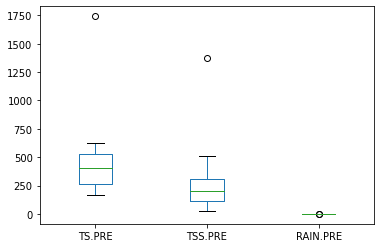

In [76]:
precon.plot.box()

<AxesSubplot:>

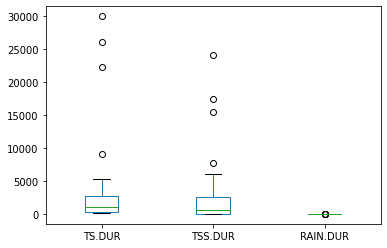

In [77]:
durcon.plot.box()

Here we see that the scales of the two data sets are quite different. Let's see if  the two construction phases represent approximately the same rainfall conditions? 

In [78]:
precon['RAIN.PRE'].describe()

count    17.000000
mean      0.878235
std       0.882045
min       0.130000
25%       0.460000
50%       0.690000
75%       0.950000
max       3.760000
Name: RAIN.PRE, dtype: float64

In [79]:
durcon['RAIN.DUR'].describe()

count    37.000000
mean      1.016486
std       1.391886
min       0.100000
25%       0.270000
50%       0.550000
75%       1.010000
max       6.550000
Name: RAIN.DUR, dtype: float64

If we look at the summary statistics, we might conclude there is more rainfall during construction, which could bias our interpretation, a box plot of just rainfall might be useful, as would hypothesis tests.

<AxesSubplot:>

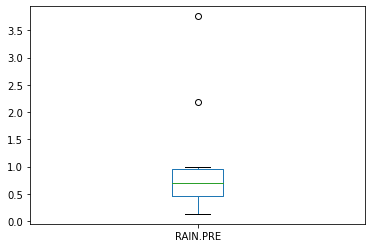

In [80]:
precon['RAIN.PRE'].plot.box()

<AxesSubplot:>

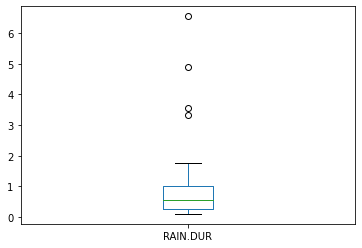

In [81]:
durcon['RAIN.DUR'].plot.box()

Hard to tell from the plots, they look a little different, but are they? Lets apply some hypothesis tests

In [82]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(precon['RAIN.PRE'],durcon['RAIN.DUR'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=291.500, p-value at rejection =0.338
Probably the same distribution


In [83]:
from scipy import stats
results = stats.ttest_ind(precon['RAIN.PRE'], durcon['RAIN.DUR'])
print('statistic=%.3f, p-value at rejection =%.3f ' % (results[0], results[1]))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=-0.375, p-value at rejection =0.709 
Probably the same distribution


From these two tests (the data are NOT paired) we conclude that the two sets of data originate from the same distribution. Thus the question "Do the two construction phases represent approximately the same rainfall conditions?" can be safely answered in the affirmative.

Continuing, lets ask the same about total solids, first plots:

<AxesSubplot:>

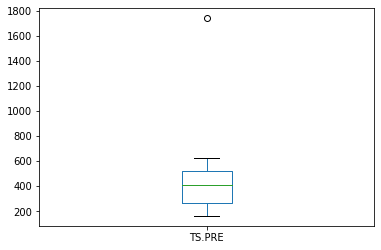

In [36]:
precon['TS.PRE'].plot.box()

<AxesSubplot:>

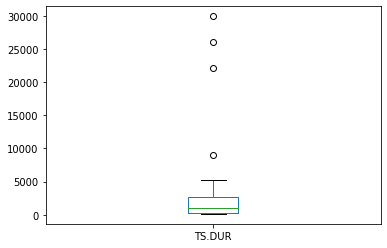

In [37]:
durcon['TS.DUR'].plot.box()

Look at the difference in scales, the during construction phase, is about 5 to 10 times greater.
But lets apply some tests to formalize our interpretation.

In [84]:
stat, p = mannwhitneyu(precon['TS.PRE'],durcon['TS.DUR'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=221.000, p-value at rejection =0.042
Probably different distributions


In [85]:
results = stats.ttest_ind(precon['TS.PRE'], durcon['TS.DUR'])
print('statistic=%.3f, p-value at rejection =%.3f ' % (results[0], results[1]))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=-1.750, p-value at rejection =0.086 
Probably different distributions


Both these tests indicate that the data derive from distirbutions with different measures of central tendency (means). 

Lets now ask the question about normality, we will apply a test called normaltest. This function tests a null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality. We will likely get a warning because our sample size is pretty small.

In [86]:
stat, p = stats.normaltest(precon['TS.PRE'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably normal distributed')
else:
    print('Probably Not-normal distributed')

statistic=32.081, p-value at rejection =0.000
Probably Not-normal distributed


/opt/conda/envs/python/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [87]:
stat, p = stats.normaltest(durcon['TS.DUR'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably normal distributed')
else:
    print('Probably Not-normal distributed')

statistic=41.701, p-value at rejection =0.000
Probably Not-normal distributed


#### References

D’Agostino, R. B. (1971), “An omnibus test of normality for moderate and large sample size”, Biometrika, 58, 341-348

D’Agostino, R. and Pearson, E. S. (1973), “Tests for departure from normality”, Biometrika, 60, 613-622


In [7]:
# script block to identify host, user, and kernel
import sys
! echo 'HID ' $HOSTNAME
! echo 'UID ' $USER
print('path to kernel == ' + sys.executable)
# print(sys.version)
print(sys.version_info)
#! pwd

HID  atomickitty.aws
UID  engr1330content
path to kernel == /opt/conda/envs/python/bin/python
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)


## Functions as Data Models

We have already examined functions as data models, and did trial and error fitting to "calibrate" a function to some data, then used that function to predict unobserved responses.  However there are ways to have the machine perform the fit on our behalf - here we will examine one such way on a subset of models.

### Polynomial data model: 

> Polynomial Model: $y_{model} = \beta_0 + \beta_1 x_{obs} + \beta_2 x_{obs}^2 + ... + \beta_n x_{obs}^n$ <br>
<!--Logarithmic Model: $y_{model} = \beta_0 + \beta_1 log(x_{obs}) $<br>
Power-Law Model: $y_{model} = \beta_0 x_{obs}^{\beta_1} $ <br>
Exponential Model: $y_{model} = \beta_0 e^{{\beta_1}x_{obs}} $ -->

One way to "fit" this models to data is to construct a design matrix $X$ comprised of $x_{obs}$ and ones (1). Then construct a linear system related to this design matrix.

The data model as a linear system is:

$$\begin{gather}
\mathbf{X} \cdot \mathbf{\beta} = \mathbf{Y}
\end{gather}$$

For example using the Polynomial Model (order 2 for brevity, but extendable as justified)

\begin{gather}
\mathbf{X}=
\begin{pmatrix}
1 & x_1 & x_1^2\\
~\\
1 & x_2 & x_2^2\\
~ \\
1 & x_3 & x_3^2\\
\dots & \dots & \dots \\
1 & x_n & x_n^2\\
\end{pmatrix}
\end{gather}

\begin{gather}
\mathbf{\beta}=
\begin{pmatrix}
\beta_0 \\
~\\
\beta_1 \\
~ \\
\beta_2 \\
\end{pmatrix}
\end{gather}

\begin{gather}
\mathbf{X}=
\begin{pmatrix}
y_1 \\
~\\
y_2 \\
~ \\
y_3 \\
\dots  \\
y_n \\
\end{pmatrix}
\end{gather}

To find the unknown $\beta$ values the solution of the linear system below provides a "best linear unbiased estimator (BLUE)" fit

$$\begin{gather}
[\mathbf{X^T}\mathbf{X}] \cdot \mathbf{\beta} = [\mathbf{X^T}]\mathbf{Y}
\end{gather}$$

or an alternative expression is

$$\begin{gather}
\mathbf{\beta} = [\mathbf{X^T}\mathbf{X}]^{-1}[\mathbf{X^T}]\mathbf{Y}
\end{gather}$$

Once the values for $\beta$ are obtained then we can apply our plotting tools and use the model to extrapolate and interpolate.  The logarithmic, power, and exponential model will involve functions of $x$ which are known, and inverse transformations.

Consider the data collected during the boost-phase of a ballistic missle.  The maximum speed of a solid-fueled missle at burn-out (when the boost-phase ends) is about 7km/s. Using this knowledge and the early-time telemetry below; fit a data model using the linear system approach and use the model to estimate boost phase burn-out.  Plot the model and data on the same axis to demonstrate the quality of the fit.

|Elapsed Time (s)|Speed (m/s)|
|---:|---:|
|0 |0|
|1.0 |3|
|2.0 |7.4|
|3.0 |16.2|
|4.0 |23.5|
|5.0 |32.2|
|6.0 | 42.2| 
|7.0 | 65.1 |
|8.0 | 73.5 |
|9.0 | 99.3 |
|10.0| 123.4|

First lets make two lists

In [2]:
time = [0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]
speed = [0,3,7.4,16.2,23.5,32.2,42.2, 65.1 ,73.5 ,99.3 ,123.4,]

Then define our model structure, here just a polynomial of degree 2 (a quadratic).

In [3]:
def polynomial(b0,b1,b2,time):
    polynomial = b0+b1*time+b2*time**2
    return(polynomial)

Now we will use numpy to build the design matrix $X$ comprised of $x_{obs}$ and ones (1), and the various transposes, and such.

In [4]:
import numpy
X = [numpy.ones(len(time)),numpy.array(time),numpy.array(time)**2] # build the design X matrix #
X = numpy.transpose(X) # get into correct shape for linear solver
Y = numpy.array(speed) # build the response Y vector
A = numpy.transpose(X)@X # build the XtX matrix
b = numpy.transpose(X)@Y # build the XtY vector
x = numpy.linalg.solve(A,b) # just solve the linear system 
print(x) # look at the answers

[1.48181818 0.51818182 1.14545455]


Now make a list of model responses to input values

In [6]:
responses = [0 for i in range(len(time))]
for i in range(len(time)):
    responses[i] = polynomial(x[0],x[1],x[2],time[i])
print(responses) # look at the responses

[1.4818181818181488, 3.1454545454545357, 7.1000000000000085, 13.345454545454567, 21.88181818181821, 32.70909090909094, 45.82727272727276, 61.236363636363656, 78.93636363636364, 98.92727272727271, 121.20909090909086]


Import our plotting script, and plot the data (red) and the data model (blue) on same plot.

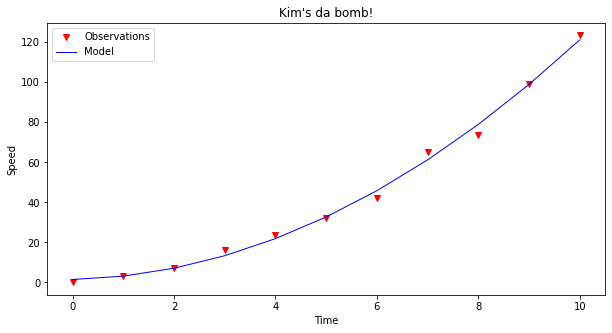

In [18]:
import make2plot # http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson16/make2plot.py
make2plot.make2plot(time,speed,time,responses,"Time","Speed","Kim's da bomb!") # notice module_name.function_name(arguments) syntax

In [24]:
time_to_burnout = float(input('Enter estimated time since begin boost phase '))
print('Estimated Speed (m/sec) :',polynomial(x[0],x[1],x[2],time_to_burnout))

Enter estimated time since begin boost phase  77.5


Estimated Speed (m/sec) : 6921.527272727259


### Power-Law Model: 
A useful model in engineering is a power-law model 
> $y_{model} = \beta_0 x_{obs}^{\beta_1} $

However it does not look very "linear", but a simple transformation by taking logs yields

> $log(y_{model}) = log10(\beta_0)+  \beta_1 log10(x_{obs}) $

which is linear in the unknown coefficients $\beta_0$ and $\beta_1$.

Using the same data we can construct a power-law model, automatically fit it and then plot to find out how well our moeld performs.

###

<!--Logarithmic Model: $y_{model} = \beta_0 + \beta_1 log(x_{obs}) $<br>
Power-Law Model: $y_{model} = \beta_0 x_{obs}^{\beta_1} $ <br>
Exponential Model: $y_{model} = \beta_0 e^{{\beta_1}x_{obs}} $ -->

In [65]:
def powerlaw(b0,b1,time):
    powerlaw = b0*time**b1
    return(powerlaw)

In [66]:
time = [0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]
speed = [0,3,7.4,16.2,23.5,32.2,42.2, 65.1 ,73.5 ,99.3 ,123.4,]
for i in range(len(time)):
    time[i]=time[i]+ 0.00001 # offset so don't log zeroes
    speed[i]=speed[i]+ 0.00001
    
X = [numpy.ones(len(time)),numpy.array(numpy.log10(time))] # build the design X matrix 
X = numpy.transpose(X) # get into correct shape for linear solver
Y = numpy.array(numpy.log10(speed)) # build the response Y vector
A = numpy.transpose(X)@X # build the XtX matrix
b = numpy.transpose(X)@Y # build the XtY vector
x = numpy.linalg.solve(A,b) # just solve the linear system 
print(x) # look at the answers

[0.7161876  1.18057628]


In [68]:
responses = [0 for i in range(len(time))]
for i in range(len(time)):
    responses[i] = powerlaw(10**x[0],x[1],time[i])
print(responses) # look at the responses

[3.342596386287005e-05, 5.202390954388261, 11.791910341727554, 19.031401381302594, 26.728168235782004, 34.783885276976775, 43.137709195328924, 51.74787306738311, 60.58374930205405, 69.62182252551928, 78.84341465786041]


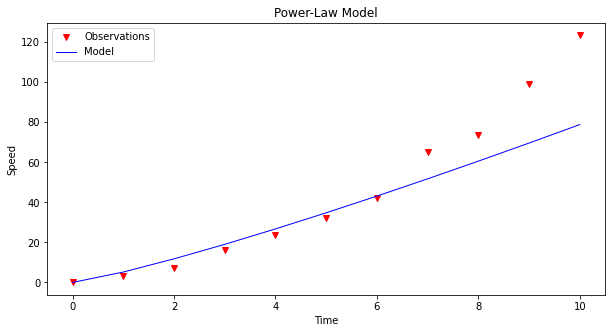

In [70]:
make2plot.make2plot(time,speed,time,responses,"Time","Speed","Power-Law Model") # notice module_name.function_name(arguments) syntax

### Exponential Model: 
Another useful model in engineering is an exponential model 
> $y_{model} = \beta_0 e^{{\beta_1}x_{obs}} $

However it does not look very "linear", but a simple transformation by taking logs yields

> $log(y_{model}) = log(\beta_0)+  \beta_1*(x_{obs}) $

which is linear in the unknown coefficients $\beta_0$ and $\beta_1$.  Notice that it is quite similar to a power-law model, but not identical.

Using the same data we can construct an exponential model, automatically fit it and then plot to find out how well our moeld performs.

###

<!--Logarithmic Model: $y_{model} = \beta_0 + \beta_1 log(x_{obs}) $<br>
Power-Law Model: $y_{model} = \beta_0 x_{obs}^{\beta_1} $ <br>
Exponential Model: $y_{model} = \beta_0 e^{{\beta_1}x_{obs}} $ -->

In [78]:
def expmodel(b0,b1,time):
    import math # somewhat overkill - but import wont hurt anything
    expmodel = b0*math.exp(b1*time)
    return(expmodel)

In [76]:
time = [0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]
speed = [0,3,7.4,16.2,23.5,32.2,42.2, 65.1 ,73.5 ,99.3 ,123.4,]
for i in range(len(time)):
    time[i]=time[i]+ 0.00001 # offset so don't log zeroes
    speed[i]=speed[i]+ 0.00001
    
X = [numpy.ones(len(time)),numpy.array(time)] # build the design X matrix 
X = numpy.transpose(X) # get into correct shape for linear solver
Y = numpy.array(numpy.log(speed)) # build the response Y vector
A = numpy.transpose(X)@X # build the XtX matrix
b = numpy.transpose(X)@Y # build the XtY vector
x = numpy.linalg.solve(A,b) # just solve the linear system 
print(x) # look at the answers

[-2.75609346  0.96267783]


In [79]:
responses = [0 for i in range(len(time))]
import math
for i in range(len(time)):
    responses[i] = expmodel(math.exp(x[0]),x[1],time[i])
print(responses) # look at the responses

[0.06354011563462764, 0.16639247070973495, 0.43573188421774983, 1.1410508787693752, 2.988069395650906, 7.82485591076801, 20.49094646643687, 53.6596318038999, 140.51845238317068, 367.97560468400997, 963.6175416544776]


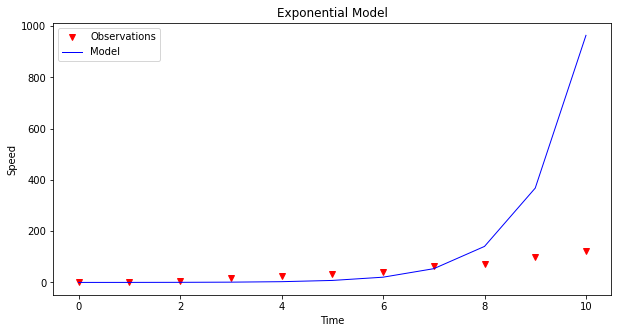

In [80]:
make2plot.make2plot(time,speed,time,responses,"Time","Speed","Exponential Model") # notice module_name.function_name(arguments) syntax

## Descriptive Statistics with Python


A fundamental part of working with data is _**describing**_ it. Descriptive statistics help simplify and summarize large amounts of data in a sensible manner. In this lecture, we will discuss __descriptive statistics__ and cover a variety of methods for __summarizing, describing, and representing__ datasets in Python. The contents of this notebook are inspired by various online resources including the following links: <br>
- "Descriptive statistics with Python-NumPy"
by __*Rashmi Jain*__, available @ https://www.hackerearth.com/blog/developers/descriptive-statistics-python-numpy/.

- "Python Statistics Fundamentals: How to Describe Your Data"
by __*Mirko Stojiljković *__, available @ https://realpython.com/python-statistics/.

- "A Quick Guide on Descriptive Statistics using Pandas and Seaborn"
by __*Bee Guan Teo*__, available @ https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32.

- "Tutorial: Basic Statistics in Python — Descriptive Statistics"
, available @ https://www.dataquest.io/blog/basic-statistics-with-python-descriptive-statistics/.



We will use the __"HighestGrossingMovies.csv"__ dataset as an illustrative example. Let's have a look at it first.

In [21]:
######### CODE TO AUTOMATICALLY DOWNLOAD THE DATABASE ################
#! pip install requests #install packages into local environment
import requests # import needed modules to interact with the internet
# make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url = 'http://54.243.252.9/engr-1330-webroot/4-Databases/HighestGrossingMovies.csv' # a csv file
response = requests.get(remote_url) # Gets the file contents puts into an object
output = open('HighestGrossingMovies.csv', 'wb') # Prepare a destination, local
output.write(response.content) # write contents of object to named local file
output.close() # close the connection

In [23]:
#Import the necessary external packages
import numpy as np
import pandas as pd

In [24]:
Movies = pd.read_csv("HighestGrossingMovies.csv")         #Dataset of the Top10 highest-grossing films as of 2019 (adjusted for inflation)
                                                          #5 columns (Movie, Director, Year, Budget, Gross) and 10 rows
Movies

,Movie,Director,Year,Budget_million$,Gross_million$
0,Gone with the Wind,Victor Fleming,1939,3.9,3706
1,Avatar,James Cameron,2009,237.0,3257
2,Titanic,James Cameron,1997,200.0,3081
3,Star Wars,George Lucas,1977,11.0,3043
4,Avengers: Endgame,Joe & Anthony Russo,2019,356.0,2798
5,The Sound of Music,Robert Wise,1965,8.2,2549
6,E.T. the Extra-Terrestrial,Steven Spielberg,1982,10.5,2489
7,The Ten Commandments,Cecil B. DeMille,1956,13.0,2356
8,Doctor Zhivago,David Lean,1965,11.0,2233
9,Star Wars: The Force Awakens,J.J. Abrams,2015,306.0,2202


Here is an overall look at some but not all of  measures we will be discussing today:
<img src="https://slideplayer.com/slide/2346765/8/images/2/Summary+Measures+Describing+Data+Numerically+Central+Tendency.jpg" width="500" align="center">


### <font color=orange>Measures of Central Tendency</font>

Centrality measures give us an estimate of the center of a distribution and a sense of a typical value we would expect to see. <br>
The three major measures of center include __*the mean, median, and mode*__.

#### <font color=orange>Mean</font>

The arithmetic mean (average) is the sum of all the values, divided by the number of values. Mean represents the typical value that acts as a yardstick for all observations.
![](https://x-engineer.org/wp-content/uploads/2016/10/Arithmetic-mean-formula-244x142.jpg?a43cfa&a43cfa)

Let's calculate the average budget of the Top10 highest-grossing films. 

In [25]:
Budget = Movies['Budget_million$']
Budget

0      3.9
1    237.0
2    200.0
3     11.0
4    356.0
5      8.2
6     10.5
7     13.0
8     11.0
9    306.0
Name: Budget_million$, dtype: float64

We can use primitive python to calculate the mean of set of numbers:

In [26]:
# Create a list of all the numbers:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
mean1 = sum(budget) / len(budget)
print("The average budget of the Top10 highest-grossing films is ",mean1,"million USD")

The average budget of the Top10 highest-grossing films is  115.66 million USD


We can also utilize a variety of external libraries. (You may find some of them familiar!)

In [27]:
# The usual suspects!
import numpy as np
import pandas as pd
# Also, these two libraries offer useful functions for descriptive statistics
import statistics
import scipy.stats

In [28]:
# Read the column of interest from the Movies dataframe
Budget = Movies['Budget_million$']
# Use the mean function from the Pandas library
mean2 = Budget.mean()
print("The average budget of the Top10 highest-grossing films is ",mean2,"million USD")

The average budget of the Top10 highest-grossing films is  115.66 million USD


In [29]:
# Read the column of interest from the Movies dataframe
Budget = Movies['Budget_million$']
# Use the mean function from the Numpy library
mean3 = np.mean(Budget)
print("The average budget of the Top10 highest-grossing films is ",mean3,"million USD")

The average budget of the Top10 highest-grossing films is  115.66 million USD


In [30]:
# Read the column of interest from the Movies dataframe
Budget = Movies['Budget_million$']
# Use the mean function from the statistics library
mean4 = statistics.mean(Budget)
print("The average budget of the Top10 highest-grossing films is ",mean4,"million USD")

The average budget of the Top10 highest-grossing films is  115.66 million USD


#### <font color=orange>Harmonic Mean</font>

The harmonic mean is the reciprocal of the mean of the reciprocals of all items in the dataset.

<img src="https://www.onlinemath4all.com/images/harmonicmean1.png" align="right">

Let's calculate the harmonic mean for the same set of numbers:

In [31]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
hmean1 = len(budget) / sum(1 / item for item in budget)
hmean1 = round(hmean1,2)
print("The harmonic mean of the budget of the Top10 highest-grossing films is ",hmean1,"million USD")

# via the Statistics library:
Budget = Movies['Budget_million$']
hmean2 = statistics.harmonic_mean(Budget)
hmean2 = round(hmean2,2)
print("The harmonic mean of the budget of the Top10 highest-grossing films is ",hmean2,"million USD")

# via the scipy.stats library:
Budget = Movies['Budget_million$']
hmean3 = scipy.stats.hmean(Budget)
hmean3 = round(hmean3,2)
print("The harmonic mean of the budget of the Top10 highest-grossing films is ",hmean3,"million USD")

The harmonic mean of the budget of the Top10 highest-grossing films is  13.38 million USD
The harmonic mean of the budget of the Top10 highest-grossing films is  13.38 million USD
The harmonic mean of the budget of the Top10 highest-grossing films is  13.38 million USD


#### <font color=orange>Geometric Mean</font>

The geometric mean is the 𝑛-th root of the product of all 𝑛 elements 𝑥ᵢ in a dataset.

![](https://ncalculators.com/images/formulas/geometric-mean.jpg)

Let's calculate the geometric mean for the same set of numbers:

In [32]:
# Primitive Python: -it is getting more lengthy and labour-intensive
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]

gmean1 = 1
for item in budget:
     gmean1 *= item

gmean1 **= 1 / len(budget)
gmean1 = round(gmean1,2)
print("The geometric mean of the budget of the Top10 highest-grossing films is ",gmean1,"million USD")

# via the Statistics library:
Budget = Movies['Budget_million$']
gmean2 = statistics.geometric_mean(Budget)
gmean2 = round(gmean2,2)

print("The geometric mean of the budget of the Top10 highest-grossing films is ",gmean2,"million USD")

# via the scipy.stats library:
Budget = Movies['Budget_million$']
gmean3 = scipy.stats.gmean(Budget)
gmean3 = round(gmean3,2)

print("The geometric mean of the budget of the Top10 highest-grossing films is ",gmean3,"million USD")

The geometric mean of the budget of the Top10 highest-grossing films is  34.96 million USD
The geometric mean of the budget of the Top10 highest-grossing films is  34.96 million USD
The geometric mean of the budget of the Top10 highest-grossing films is  34.96 million USD


#### <font color=darkorange>Arithmetic or Geometric or Harmonic?- How to be Mean!</font>
<img src="https://pbs.twimg.com/media/Dm2BdG2V4AE36xP.jpg" width="500" align="left">

- If values have the same units: Use the arithmetic mean. 
- If values have differing units: Use the geometric mean. 
- Also, commonly used for growth rates, like population growth or interest rates.
- If values are rates: Use the harmonic mean. 
<br>
<br>


**Learn More:**
If you are interested in knowing more about these 3 and their differences, you may find these sources interesting:
- "Arithmetic, Geometric, and Harmonic Means for Machine Learning Arithmetic, Geometric, and Harmonic Means for Machine Learning" by Jason Brownlee, available @ https://machinelearningmastery.com/arithmetic-geometric-and-harmonic-means-for-machine-learning/#:~:text=The%20arithmetic%20mean%20is%20appropriate,with%20different%20measures%2C%20called%20rates.

- "On Average, You’re Using the Wrong Average: Geometric & Harmonic Means in Data Analysis"
by Daniel McNichol, available @ https://towardsdatascience.com/on-average-youre-using-the-wrong-average-geometric-harmonic-means-in-data-analysis-2a703e21ea0

#### <font color=orange>Median</font>

Median is the middle element of a sorted dataset. The value where the upper half of the data lies above it and lower half lies below it. In other words, it is the middle value of a data set. To calculate the median, arrange the data points in the increasing (or decreasing) order and the middle value is the median. If the number of elements 𝑛 of the dataset is odd, then the median is the value at the middle position: 0.5(𝑛 + 1). If 𝑛 is even, then the median is the arithmetic mean of the two values in the middle, that is, the items at the positions 0.5𝑛 and 0.5𝑛 + 1.
Let's find the median of the gross of the Top10 highest-grossing films: 

In [33]:
Gross = Movies['Gross_million$']
Gross

0    3706
1    3257
2    3081
3    3043
4    2798
5    2549
6    2489
7    2356
8    2233
9    2202
Name: Gross_million$, dtype: int64

We can use primitive python to calculate the median of a set of numbers:

In [34]:
# Create a list of all the numbers:
gross = [3706,3257,3081,3043,2798,2549,2489,2356,2233,2202]
n = len(gross)
if n % 2:
     median1 = sorted(gross)[round(0.5*(n-1))]
else:
     gross_ord, index = sorted(gross), round(0.5 * n)
     median1 = 0.5 * (gross_ord[index-1] + gross_ord[index])

print("The median of gross of the Top10 highest-grossing films is ",median1,"million USD")

The median of gross of the Top10 highest-grossing films is  2673.5 million USD


We can use also use external libraries:

In [35]:
#via the Pandas library:
Gross = Movies['Gross_million$']
median2 = Gross.median()
print("The median of gross of the Top10 highest-grossing films is ",median2,"million USD")

#via the Numpy library:
Gross = Movies['Gross_million$']
median3 = np.median(Gross)
print("The median of gross of the Top10 highest-grossing films is ",median3,"million USD")

#via the Statistics library:
Gross = Movies['Gross_million$']
median4 = statistics.median(Gross)
print("The median of gross of the Top10 highest-grossing films is ",median4,"million USD")
#2 more functions from the same library- For even number of cases:
print("low median :",statistics.median_low(Gross))
print("high median :",statistics.median_high(Gross))

The median of gross of the Top10 highest-grossing films is  2673.5 million USD
The median of gross of the Top10 highest-grossing films is  2673.5 million USD
The median of gross of the Top10 highest-grossing films is  2673.5 million USD
low median : 2549
high median : 2798


The main difference between the behavior of the mean and median is related to dataset outliers or extremes. The mean is heavily affected by outliers, but the median only depends on outliers either slightly or not at all. You can compare the mean and median as one way to detect outliers and asymmetry in your data. Whether the mean value or the median value is more useful to you depends on the context of your particular problem. The mean is a better choice when there are no extreme values that can affect it. It is a better summary because the information from every observation is included rather than median, which is just the middle value. However, in the presence of outliers, median is considered a better alternative. Check this out:

In [36]:
newgross = [99999,3257,3081,3043,2798,2549,2489,2356,2233,2202] #We have replaced 3706 with 99999- an extremely high number (an outlier)
newmean = np.mean(newgross)
newmedian = np.median(newgross)
print(newmean)   #A huge change from the previous value (115.66) - Mean is very sensitive to outliers and extreme values
print(newmedian) #No Change- the median only depends on outliers either slightly or not at all. 

12400.7
2673.5


To read more about the differences of mean and median, check these out:
- "Stuck in the middle – mean vs. median"
, available @ https://www.clinfo.eu/mean-median/

- "Mean vs Median: When to Use Which Measure?"
, available @ https://www.datascienceblog.net/post/basic-statistics/mean_vs_median/

- "Mean vs. Median"
by __*AnswerMiner*__, available @ https://www.answerminer.com/blog/mean-vs-median

#### <font color=orange>Mode</font>

The value that occurs the most number of times in our data set. Closely tied to the concept of frequency, mode provides information on the most recurrent elements in a dataset. When the mode is not unique, we say that the data set is bimodal, while a data set with more than two modes is multimodal. Let's find the mode in the gross of the Top10 highest-grossing films:

In [37]:
# In primitive Python:
# Create a list of all the numbers:
gross = [3706,3257,3081,3043,2798,2549,2489,2356,2233,2202]
mode1 = max((gross.count(item), item) for item in gross)[1]
print(mode1) #Since each item is repeated only once, only the first element is printed- This is a multimodal set. 

#via the Pandas library:
Gross = Movies['Gross_million$']
mode2 = Gross.mode()
print(mode2) #Returns all modal values- This is a multimodal set. 

#via the Statistics library:
Gross = Movies['Gross_million$']
mode3 = statistics.mode(Gross)
print(mode3) #Return a single value
mode4 = statistics.multimode(Gross)
print(mode4) #Returns a list of all modes

#via the scipy.stats library:
Gross = Movies['Gross_million$']
mode5 = scipy.stats.mode(Gross)
print(mode5) #Returns the object with the modal value and the number of times it occurs- If multimodal: only the smallest value

3706
0    2202
1    2233
2    2356
3    2489
4    2549
5    2798
6    3043
7    3081
8    3257
9    3706
dtype: int64
3706
[3706, 3257, 3081, 3043, 2798, 2549, 2489, 2356, 2233, 2202]
ModeResult(mode=array([2202]), count=array([1]))


Mode is not useful when our distribution is flat; i.e., the frequencies of all groups are similar. Mode makes sense when we do not have a numeric-valued data set which is required in case of the mean and the median. For instance:

In [38]:
Director = Movies['Director']
# via statistics:
mode6 = statistics.mode(Director)
print(mode6) #"James Cameron" with two films (x2 repeats) is the mode
# via pandas:
mode7 = Director.mode()
print(mode7) #"James Cameron" with two films (x2 repeats) is the mode

James Cameron
0    James Cameron
dtype: object


To read more about mode, check these out:
- "Mode: A statistical measure of central tendency"
, available @ https://corporatefinanceinstitute.com/resources/knowledge/other/mode/

- "When to use each measure of Central Tendency"
, available @ https://courses.lumenlearning.com/introstats1/chapter/when-to-use-each-measure-of-central-tendency/

- "Mean, Median, Mode: What They Are, How to Find Them"
, available @ https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-median-mode/

### <font color=cyan>Measures of Dispersion</font>

Measures of dispersion are values that describe how the data varies. It gives us a sense of how much the data tends to diverge from the typical value. Aka measures of variability, they quantify the spread of data points.The major measures of dispersion include __*range, percentiles, inter-quentile range, variance, standard deviation, skeness and kurtosis*__.

#### <font color=cyan>Range</font>

The range gives a quick sense of the spread of the distribution to those who require only a rough indication of the data. There are some disadvantages of using the range as a measure of spread. One being it does not give any information of the data in between maximum and minimum. Also, the range is very sensitive to extreme values. Let's calculate the range for the budget of the Top10 highest-grossing films: 

In [39]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
range1 = max(budget)-min(budget)
print("The range of the budget of the Top10 highest-grossing films is ",range1,"million USD")

# via the Statistics library:
Budget = Movies['Budget_million$']
range2 = np.ptp(Budget) #ptp stands for Peak To Peak
print("The range of the budget of the Top10 highest-grossing films is ",range2,"million USD")

The range of the budget of the Top10 highest-grossing films is  352.1 million USD
The range of the budget of the Top10 highest-grossing films is  352.1 million USD


#### <font color=cyan>Percentiles and Quartiles</font>

A measure which indicates the value below which a given percentage of points in a dataset fall. The sample 𝑝 percentile is the element in the dataset such that 𝑝% of the elements in the dataset are less than or equal to that value. Also, (100 − 𝑝)% of the elements are greater than or equal to that value. For example, median represents the 50th percentile. Similarly, we can have 0th percentile representing the minimum and 100th percentile representing the maximum of all data points. Percentile gives the relative position of a particular value within the dataset. It also helps in comparing the data sets which have different means and deviations.
Each dataset has three quartiles, which are the percentiles that divide the dataset into four parts:

- The first quartile (Q1) is the sample 25th percentile. It divides roughly 25% of the smallest items from the rest of the dataset.
- The second quartile Q2) is the sample 50th percentile or the median. Approximately 25% of the items lie between the first and second quartiles and another 25% between the second and third quartiles.
- The third quartile (Q3) is the sample 75th percentile. It divides roughly 25% of the largest items from the rest of the dataset.

In [40]:
Budget = Movies['Budget_million$']
#via Numpy:
p10 = np.percentile(Budget, 10) #returns the 10th percentile
print("The 10th percentile of the budget of the Top10 highest-grossing films is ",p10)
p4070 = np.percentile(Budget, [40,70]) #returns the 40th and 70th percentile
print("The 40th and 70th percentile of the budget of the Top10 highest-grossing films are ",p4070)
#via Pandas:
p10n = Budget.quantile(0.10) #returns the 10th percentile - notice the difference from Numpy
print("The 10th percentile of the budget of the Top10 highest-grossing films is ",p10n)
#via Statistics:
Qs = statistics.quantiles(Budget, n=4, method='inclusive')     #The parameter n defines the number of resulting equal-probability percentiles: 
                                                               #n=4 returns the quartiles | n=2 returns the median
print("The quartiles of the budget of the Top10 highest-grossing films is ",Qs)

The 10th percentile of the budget of the Top10 highest-grossing films is  7.77
The 40th and 70th percentile of the budget of the Top10 highest-grossing films are  [ 11.  211.1]
The 10th percentile of the budget of the Top10 highest-grossing films is  7.77
The quartiles of the budget of the Top10 highest-grossing films is  [10.625, 12.0, 227.75]


#### <font color=cyan>InterQuartile Range (IQR)</font>

IQR is the difference between the third quartile and the first quartile (Q3-Q1). The interquartile range is a better option than range because it is not affected by outliers. It removes the outliers by just focusing on the distance within the middle 50% of the data.

In [41]:
Budget = Movies['Budget_million$']
#via Numpy:
IQR1 = np.percentile(Budget, 75) -np.percentile(Budget, 25)    #returns the IQR = Q3-Q1 = P75-P25
print("The IQR of the budget of the Top10 highest-grossing films is ",IQR1)
#via scipy.stats:
IQR2 = scipy.stats.iqr(Budget)    #returns the IQR- Can be used for other percentile differences as well >> iqr(object, rng=(p1, p2))
print("The IQR of the budget of the Top10 highest-grossing films is ",IQR2)

The IQR of the budget of the Top10 highest-grossing films is  217.125
The IQR of the budget of the Top10 highest-grossing films is  217.125


#### <font color=cyan>The Five-number Summary</font>

A five-number summary is especially useful in descriptive analyses or during the preliminary investigation of a large data set. A summary consists of five values: the most extreme values in the data set (the maximum and minimum values), the lower and upper quartiles, and the median. Five-number summary can be used to describe any data distribution. Boxplots are extremely useful graphical representation of the 5-number summary that we will discuss later.

In [50]:
Budget = Movies['Budget_million$']
Budget.describe()     #Remember this jewel from Pandas? -It directly return the 5-number summary AND MORE!

count     10.000000
mean     115.660000
std      142.739991
min        3.900000
25%       10.625000
50%       12.000000
75%      227.750000
max      356.000000
Name: Budget_million$, dtype: float64

Boxplots are extremely useful graphical representation of the 5-number summary. It can show the range, interquartile range, median, mode, outliers, and all quartiles.

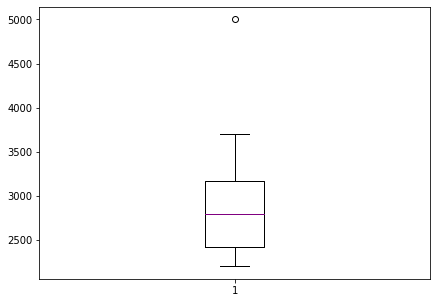

In [51]:
import matplotlib.pyplot as plt  #Required for the plot

gross = [3706,3257,3081,3043,2798,2549,2489,2356,2233,2202,5000] #same data + an outlier: 5000

fig = plt.figure(figsize =(7, 5))
plt.boxplot(gross,medianprops={'linewidth': 1, 'color': 'purple'})

plt.show()

To read more about the 5-number summary, check these out:
- "Find a Five-Number Summary in Statistics: Easy Steps"
, available @ https://www.statisticshowto.com/how-to-find-a-five-number-summary-in-statistics/

- "The Five-Number Summary"
, available @ https://www.purplemath.com/modules/boxwhisk2.htm

- "What Is the 5 Number Summary?"
by __*Courtney Taylor*__, available @ https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-median-mode/

#### <font color=cyan>Variance</font>

The sample variance quantifies the spread of the data. It shows numerically how far the data points are from the mean. The observations may or may not be meaningful if observations in data sets are highly spread. Let's calculate the variance for budget of the Top10 highest-grossing films.

![](https://miro.medium.com/max/666/0*ovSFlxj9RJMgtQoX.png)

Note that if we are working with the entire population (and not the sample), the denominator should be "n" instead of "n-1".

Note that if we are working with the entire population (and not the sample), the denominator should be "n" instead of "n-1".

In [52]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
n = len(budget)
mean = sum(budget) / n
var1 = sum((item - mean)**2 for item in budget) / (n - 1)
print("The variance of the budget of the Top10 highest-grossing films is ",var1)

# via the Statistics library:
Budget = Movies['Budget_million$']
var2 = statistics.variance(Budget)
print("The variance of the budget of the Top10 highest-grossing films is ",var2)

The variance of the budget of the Top10 highest-grossing films is  20374.70488888889
The variance of the budget of the Top10 highest-grossing films is  20374.70488888889


#### <font color=cyan>Standard Deviation</font>

The sample standard deviation is another measure of data spread. It’s connected to the sample variance, as standard deviation, 𝑠, is the positive square root of the sample variance. The standard deviation is often more convenient than the variance because it has the same unit as the data points.

![](https://cdn.kastatic.org/googleusercontent/N8xzWFc6eo0XBHEXZjz1SwvLSnPezvhTRF1P17kdjUG_tnJivGKkyCxbwVe4MZ0-USOxIZBohgcjdi8e7Z4Hswcqfw)


In [53]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
n = len(budget)
mean = sum(budget) / n
var = sum((item - mean)**2 for item in budget) / (n - 1)
sd1 = var**0.5
print("The standard deviation of the budget of the Top10 highest-grossing films is ",sd1,"million USD")

# via the Statistics library:
Budget = Movies['Budget_million$']
sd2 = statistics.stdev(Budget)
print("The standard deviation of the budget of the Top10 highest-grossing films is ",sd2,"million USD")

The standard deviation of the budget of the Top10 highest-grossing films is  142.73999050332353 million USD
The standard deviation of the budget of the Top10 highest-grossing films is  142.73999050332353 million USD


#### <font color=pink>Skewness</font>

The sample skewness measures the asymmetry of a data sample. There are several mathematical definitions of skewness. The Fisher-Pearson standardized moment coefficient is calculated by using mean, median and standard deviation of the data. 

![](https://miro.medium.com/max/560/1*B-n9Ujb_IPggKO9P52jrDA.png)

Usually, negative skewness values indicate that there’s a dominant tail on the left side. Positive skewness values correspond to a longer or fatter tail on the right side. If the skewness is close to 0 (for example, between −0.5 and 0.5), then the dataset is considered quite symmetrical.

In [54]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
n = len(budget)
mean = sum(budget) / n
var = sum((item - mean)**2 for item in budget) / (n - 1)
std = var**0.5
skew1 = (sum((item - mean)**3 for item in budget)
         * n / ((n - 1) * (n - 2) * std**3))
print("The skewness of the budget of the Top10 highest-grossing films is ",skew1)

# via the scipy.stats library:
Budget = Movies['Budget_million$']
skew2 = scipy.stats.skew(Budget, bias=False)
print("The skewness of the budget of the Top10 highest-grossing films is ",skew2)

# via the Pandas library:
Budget = Movies['Budget_million$']
skew3 = Budget.skew()
print("The skewness of the budget of the Top10 highest-grossing films is ",skew3)

The skewness of the budget of the Top10 highest-grossing films is  0.7636547490528159
The skewness of the budget of the Top10 highest-grossing films is  0.763654749052816
The skewness of the budget of the Top10 highest-grossing films is  0.763654749052816


#### <font color=pink>Kurtosis</font>

Kurtosis describes the peakedness of the distribution. In other words, Kurtosis identifies whether the tails of a given distribution contain extreme values. While Skewness essentially measures the symmetry of the distribution, kurtosis determines the heaviness of the distribution tails.

![](https://miro.medium.com/max/2220/1*-UQjlHtFyW6m5gcyZ6db2A.png)

If the distribution is tall and thin it is called a leptokurtic distribution. Values in a leptokurtic distribution are near the mean or at the extremes. A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic distribution. A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic distribution. 

In [55]:
# via the scipy.stats library:
Budget = Movies['Budget_million$']
Kurt = scipy.stats.kurtosis(Budget)
print("The kurtosis of the budget of the Top10 highest-grossing films is ",Kurt) #a platykurtic distribution | the tails are heavy


The kurtosis of the budget of the Top10 highest-grossing films is  -1.3110307923262225


To read more about skewness and kurtosis, check these out:
- "Measures of Skewness and Kurtosis"
, available @ https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=Skewness%20is%20a%20measure%20of,relative%20to%20a%20normal%20distribution.

- "Are the Skewness and Kurtosis Useful Statistics?"
, available @ https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics

- "Skew and Kurtosis: 2 Important Statistics terms you need to know in Data Science"
by __*Diva Dugar*__, available @ https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

- "Measures of Shape: Skewness and Kurtosis"
by __*Stan Brown*__, available @ https://brownmath.com/stat/shape.htm